In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from keras.preprocessing import image

In [4]:
import tensorflow

In [5]:
import os

In [6]:
from pathlib import Path

In [7]:
import matplotlib.pyplot as plt


In [8]:
p=Path("Images/")

In [9]:
dirs=p.glob("*.jpg")

In [10]:
print(type(dirs))

<class 'generator'>


In [11]:
print(dirs)

<generator object Path.glob at 0x0000017F9554A200>


In [12]:
train=pd.read_csv("train.csv")

In [13]:
test=pd.read_csv("test.csv")

In [14]:
print(train.head)

<bound method NDFrame.head of      ImageId NameOfPokemon
0    296.jpg       Pikachu
1    297.jpg       Pikachu
2    298.jpg       Pikachu
3    299.jpg       Pikachu
4    300.jpg       Pikachu
..       ...           ...
299  616.jpg    Charmander
300  617.jpg    Charmander
301  618.jpg    Charmander
302  619.jpg    Charmander
303  620.jpg    Charmander

[304 rows x 2 columns]>


In [15]:
trainX=train.values

In [16]:
print(train.shape)

(304, 2)


In [17]:
indexes=trainX[:,0]

In [18]:
df=pd.DataFrame(data=trainX,index=indexes)

In [27]:
index='300.jpg'
print(df.loc['300.jpg'])

0    300.jpg
1    Pikachu
Name: 300.jpg, dtype: object


In [45]:
print('300.jpg' in df.index )

True


In [61]:
image_data=[]
labels=[]
for images in p.iterdir():
    if images.name in df.index:
            img=image.load_img(images,target_size=(100,100))
            img_array = image.img_to_array(img)
            image_data.append(img_array)
            labels.append(df.loc[images.name][1])
    else:
        continue

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [62]:
image_data = np.array(image_data,dtype='float32')/255.0
labels = np.array(labels)

print(image_data.shape,labels.shape)

(304, 100, 100, 3) (304,)


In [63]:
import random

combined = list(zip(image_data,labels))
random.shuffle(combined)

#Unzip
image_data[:],labels[:] = zip(*combined)

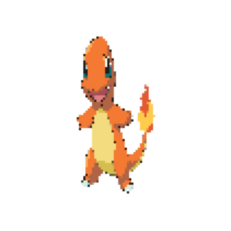

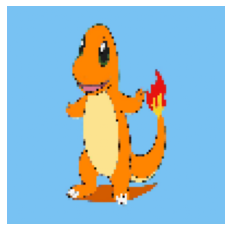

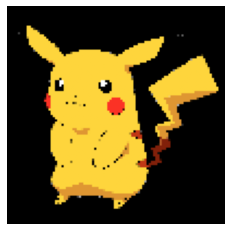

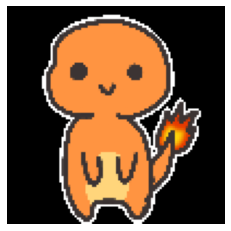

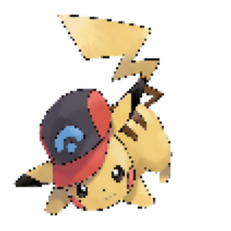

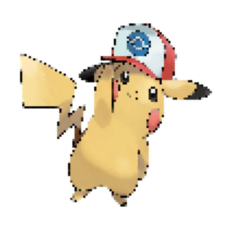

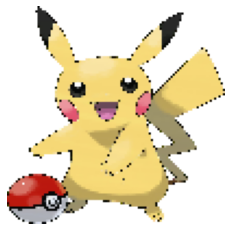

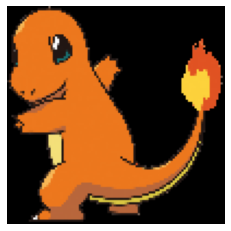

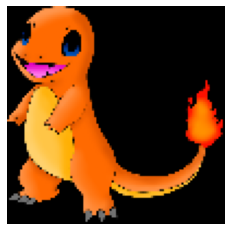

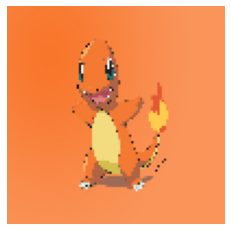

In [64]:
def drawImg(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()    
    return 

for i in range(10):
    drawImg(image_data[i])

In [65]:
M = image_data.shape[0] 
image_data = image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)

(304, 30000)
(304,)


In [66]:
from sklearn import svm

In [69]:
svm_classifier = svm.SVC(kernel='linear',C=1.0)

In [70]:
svm_classifier.fit(image_data,labels)
svm_classifier.score(image_data,labels)

0.6875

In [71]:
testX=test.values

In [72]:
print(test.shape)

(123, 1)


In [85]:
test_data=[]
names=[]
for images in p.iterdir():
    if images.name in testX:
            img=image.load_img(images,target_size=(100,100))
            img_array = image.img_to_array(img)
            test_data.append(img_array)
            names.append(images.name)
    else:
        continue

In [86]:
test_data=np.array(test_data)
M = test_data.shape[0] 
test_data = test_data.reshape(M,-1)

In [87]:
print(test_data.shape)

(123, 30000)


In [88]:
result=svm_classifier.predict(test_data)

In [90]:
print(type(result))

<class 'numpy.ndarray'>


In [91]:
print(result.shape)

(123,)


In [93]:
names=np.array(names)

In [94]:
print(names.shape)

(123,)


In [95]:
df1=pd.DataFrame(data=result,index=names)

In [99]:
print(df1)

                   0
1100.jpg   Bulbasaur
1101.jpg     Pikachu
1102.jpg   Bulbasaur
1103.jpg   Bulbasaur
1104.jpg   Bulbasaur
...              ...
2236.jpg  Charmander
2237.jpg     Pikachu
2238.jpg  Charmander
2239.jpg  Charmander
2240.jpg  Charmander

[123 rows x 1 columns]


'1106.jpg'

In [111]:
final=[]
for i in range (testX.shape[0]):
    final.append(df1.loc[testX[i][0]][0])
    

In [112]:
print(final)

['Bulbasaur', 'Charmander', 'Bulbasaur', 'Charmander', 'Pikachu', 'Charmander', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Pikachu', 'Bulbasaur', 'Charmander', 'Pikachu', 'Charmander', 'Charmander', 'Pikachu', 'Charmander', 'Pikachu', 'Pikachu', 'Charmander', 'Bulbasaur', 'Charmander', 'Charmander', 'Bulbasaur', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Charmander', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Pikachu', 'Charmander', 'Pikachu', 'Pikachu', 'Charmander', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Charmander', 'Charmander', 'Pikachu', 'Charmander', 'Pikachu', 'Bulbasaur', 'Charmander', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Charmander', 'Charmander', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Pikachu', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Bulbasaur', 'Pikachu', 'Charmander', 'Charmander', 'Charmander', 'Bulbasaur', 'Pikachu', 'Bulbasaur', 'P

In [113]:
final=np.array(final)

In [116]:
print(testX.shape)

(123, 1)


In [117]:
print(final.shape)

(123,)


In [118]:
final=final.reshape((-1,1))

In [119]:
print(final.shape)

(123, 1)


In [122]:
merge=np.hstack((testX,final))

In [123]:
print(merge.shape)

(123, 2)


In [124]:
print(merge)

[['1106.jpg' 'Bulbasaur']
 ['2236.jpg' 'Charmander']
 ['1131.jpg' 'Bulbasaur']
 ['2221.jpg' 'Charmander']
 ['2011.jpg' 'Pikachu']
 ['2030.jpg' 'Charmander']
 ['2035.jpg' 'Pikachu']
 ['1110.jpg' 'Pikachu']
 ['1104.jpg' 'Bulbasaur']
 ['2217.jpg' 'Pikachu']
 ['1111.jpg' 'Pikachu']
 ['1100.jpg' 'Bulbasaur']
 ['1112.jpg' 'Pikachu']
 ['1138.jpg' 'Bulbasaur']
 ['2238.jpg' 'Charmander']
 ['2009.jpg' 'Pikachu']
 ['2225.jpg' 'Charmander']
 ['2240.jpg' 'Charmander']
 ['2020.jpg' 'Pikachu']
 ['2209.jpg' 'Charmander']
 ['2029.jpg' 'Pikachu']
 ['1114.jpg' 'Pikachu']
 ['2201.jpg' 'Charmander']
 ['1118.jpg' 'Bulbasaur']
 ['2025.jpg' 'Charmander']
 ['2202.jpg' 'Charmander']
 ['1117.jpg' 'Bulbasaur']
 ['1119.jpg' 'Bulbasaur']
 ['2000.jpg' 'Pikachu']
 ['2007.jpg' 'Pikachu']
 ['2039.jpg' 'Pikachu']
 ['2017.jpg' 'Pikachu']
 ['2215.jpg' 'Charmander']
 ['1120.jpg' 'Bulbasaur']
 ['2006.jpg' 'Pikachu']
 ['1116.jpg' 'Pikachu']
 ['1128.jpg' 'Bulbasaur']
 ['1125.jpg' 'Bulbasaur']
 ['2203.jpg' 'Charmander']
 ['113

In [125]:
submit=pd.DataFrame(data=merge,columns=['ImageId','NameOfPokemon'],index=None)

In [126]:
print(submit)

      ImageId NameOfPokemon
0    1106.jpg     Bulbasaur
1    2236.jpg    Charmander
2    1131.jpg     Bulbasaur
3    2221.jpg    Charmander
4    2011.jpg       Pikachu
..        ...           ...
118  1124.jpg     Bulbasaur
119  2014.jpg       Pikachu
120  2235.jpg    Charmander
121  1126.jpg       Pikachu
122  2021.jpg       Pikachu

[123 rows x 2 columns]


In [128]:
submit.to_csv('result.csv',index=False)